<a href="https://colab.research.google.com/github/kchopra456/ml-model-template/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

print('Setup Complete.')

Setup Complete.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
housing = pd.read_csv('./housing.csv')
print('Data load Complete.')


Data load Complete.


## Data surfing


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Visualiztion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd71000128>,
      dtype=object)

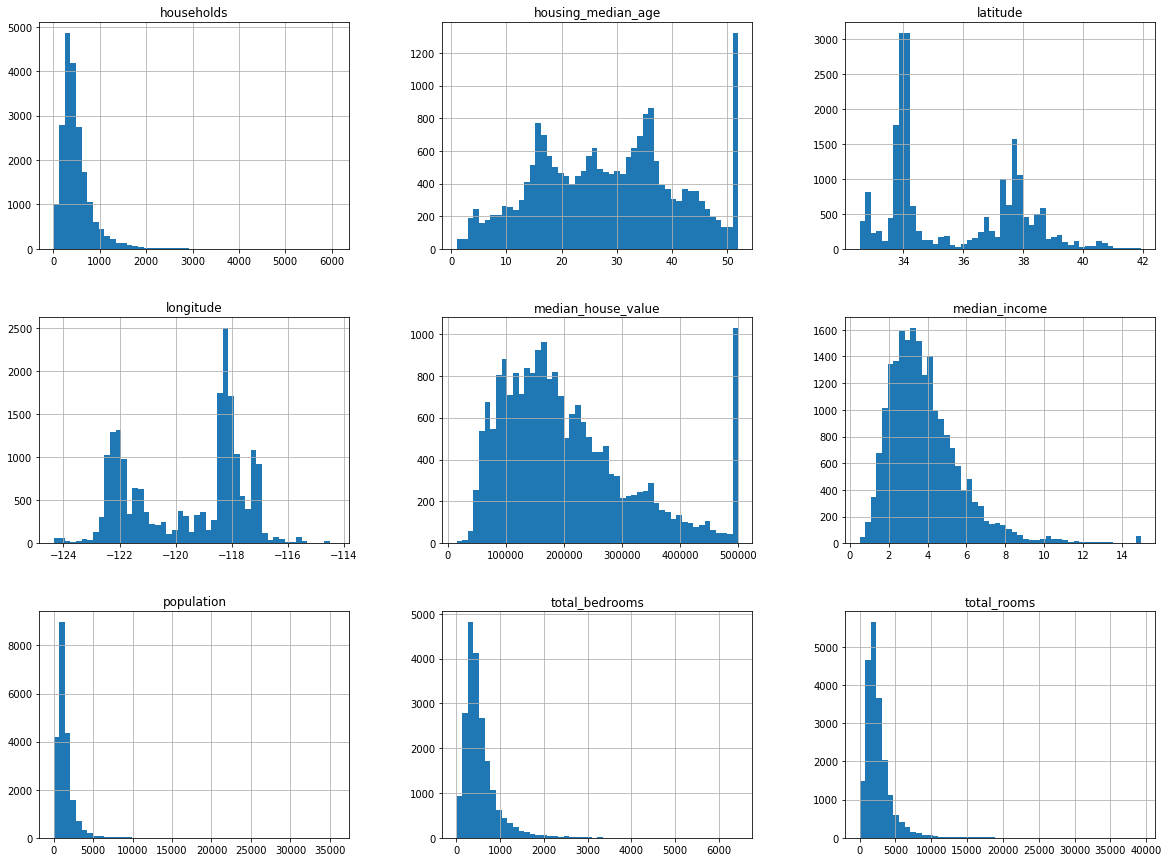

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Deductions
- A few features are capped.
- Most of the features are tail heavy, better to have bell shaped distribution.

## Dataset Division
- `Data Snooping bias` - Selecting a model to fit better to test set, voids generalization.
- `Sampling bias`- 
    - If dataset is large, then random sampling suffice for dataset split, if not better to introduce stratified sampling.
    - To obtain stratified split data, choose a column with supposedly high significance in prediction (`median_income here`).
    - AS the data is continuous numerical type, need to create categorical split to create stratas.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5e4870f0>]],
      dtype=object)

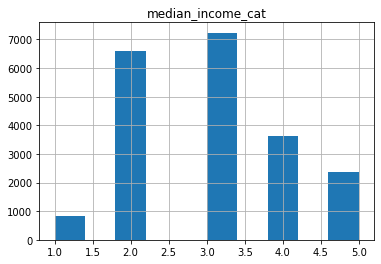

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split as ttsplit


housing['median_income_cat'] = np.ceil(housing['median_income']/1.5)
housing['median_income_cat'].where(housing['median_income_cat'] < 5, 5.0, inplace=True)

housing.head()
housing.hist(column=['median_income_cat'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5e0915f8>]],
      dtype=object)

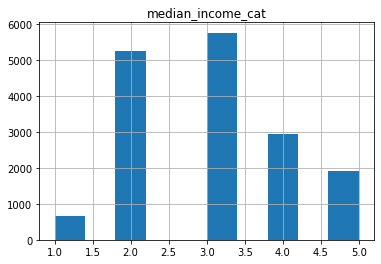

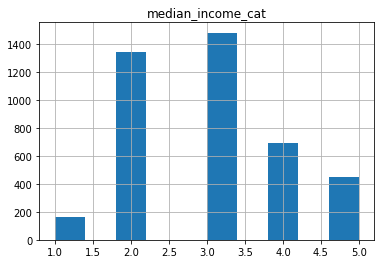

In [33]:
train_set, test_set = ttsplit(housing, test_size=0.2, random_state=42)
train_set.hist(column=['median_income_cat'])
test_set.hist(column=['median_income_cat'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5dd7f860>]],
      dtype=object)

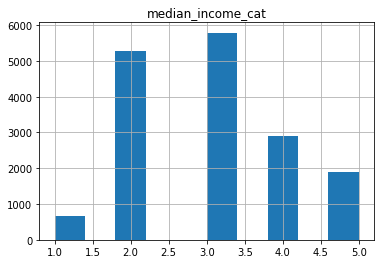

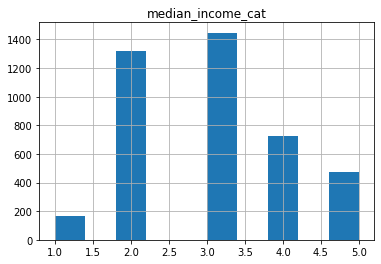

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['median_income_cat']):
  train_set = housing.loc[train_index]
  test_set = housing.loc[test_index]

train_set.hist(column=['median_income_cat'])
test_set.hist(column=['median_income_cat'])

In [0]:
train_set.drop(labels=['median_income_cat'], axis=1, inplace=True)
test_set.drop(labels=['median_income_cat'], axis=1, inplace=True)

In [0]:
housing = train_set.copy()

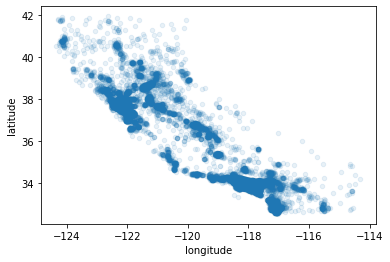

In [44]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

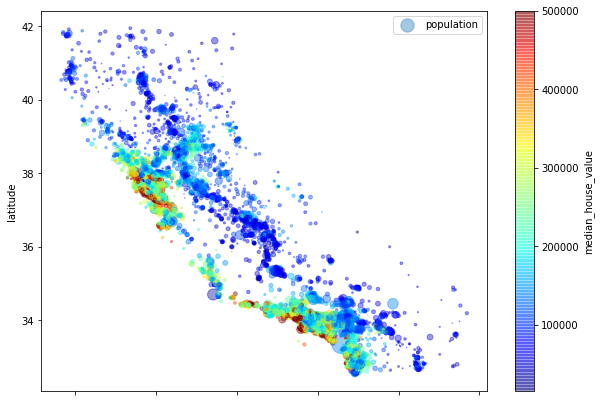

In [46]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)